## Importação das Bibliotecas

In [49]:
# Pacotes de manipulação de dados
import numpy as np
import pandas as pd

# Pacotes para cálculos estatísticos
from composicao_estatisticas import composicao_histograma_boxplot
from composicao_estatisticas import calcular_estatisticas

# Pacotes gráficos
import matplotlib.pyplot as plt
import seaborn as sns
from cycler import cycler

## Importação e tratamento da base de dados

In [2]:
# Carregar os dados do arquivo Excel
df = pd.read_excel('base_salarios.xlsx')

In [3]:
# Exibir o número de linhas e colunas
print('Número de linhas e colunas:')
print(df.shape)

Número de linhas e colunas:
(46, 6)


In [8]:
# Exibir as primeiras linhas dos dados
df.head(8)

,Núm. Funcionário,Salario,Anos de Educação Superior,Tempo na Empresa,Tempo de Experiencia em outras empresas,Inglês
0,29,4139.5,0,0,11,Não
1,19,4331.1,0,6,1,Não
2,38,4629.1,2,1,6,Não
3,26,4645.9,0,5,4,Não
4,17,4651.2,2,0,6,Não
5,20,5072.4,4,0,6,Não
6,44,5170.9,1,5,9,Não
7,34,5228.3,3,2,2,Não


In [10]:
# Remover as colunas desnecessárias
columns_to_drop = ['Núm. Funcionário']
columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df.drop(columns=columns_to_drop, inplace=True)


# Renomear as colunas conforme especificado
df.rename(columns={
    'Salario': 'Salario',
    'Anos de Educação Superior': 'Anos_Educ_Superior',
    'Tempo na Empresa': 'Tempo_Empresa',
    'Tempo de Experiencia em outras empresas': 'Tempo_Outras_Empresas',
    'Inglês': 'Ingles'
}, inplace=True)

In [11]:
# Amostra de dados da base
df.sample(5, random_state=42)

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_Outras_Empresas,Ingles
39,9316.0,6,25,3,Sim
25,6570.9,4,19,1,Não
26,6788.4,5,21,1,Não
44,11974.4,12,25,4,Sim
35,8086.9,6,14,3,Sim


## Análise Exploratória

### Salários

In [24]:
# Aplicar a função
estatisticas_df_salario = calcular_estatisticas(df['Salario'].to_numpy())

# Exibir as estatísticas
print("Estatísticas para a coluna 'Salario' do DataFrame:")
for chave, valor in estatisticas_df_salario.items():
    print(f"{chave}: {valor:.2f}")

Estatísticas para a coluna 'Salario' do DataFrame:
Média: 6969.80
Mediana: 6394.75
Moda: 4139.50
Variância: 3705120.18
Desvio Padrão: 1924.87
Assimetria: 1.04
Curtose: 3.66
1º Quartil: 5818.35
2º Quartil (Mediana): 6394.75
3º Quartil: 7972.40


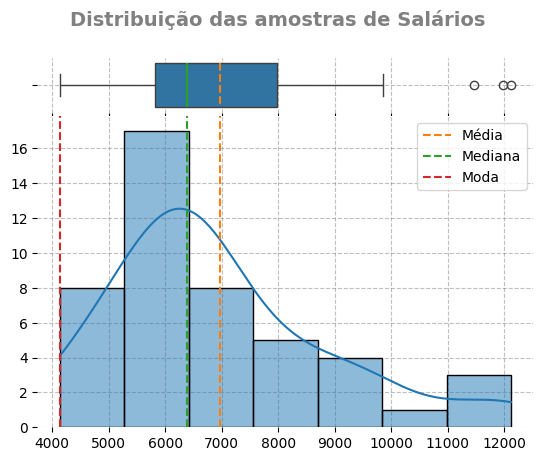

In [15]:
composicao_histograma_boxplot(df, 'Salario', titulo="Distribuição das amostras de Salários")

### Anos de Educação Superior

In [30]:
# Aplicar a função
estatisticas_df_anos_educ_superior = calcular_estatisticas(df['Anos_Educ_Superior'].to_numpy())

# Exibir as estatísticas
print("Estatísticas para a coluna 'Anos_Educ_Superior' do DataFrame:")
for chave, valor in estatisticas_df_anos_educ_superior.items():
    print(f"{chave}: {valor:.2f}")

Estatísticas para a coluna 'Anos_Educ_Superior' do DataFrame:
Média: 5.07
Mediana: 5.00
Moda: 4.00
Variância: 8.06
Desvio Padrão: 2.84
Assimetria: 0.39
Curtose: 3.06
1º Quartil: 4.00
2º Quartil (Mediana): 5.00
3º Quartil: 6.00


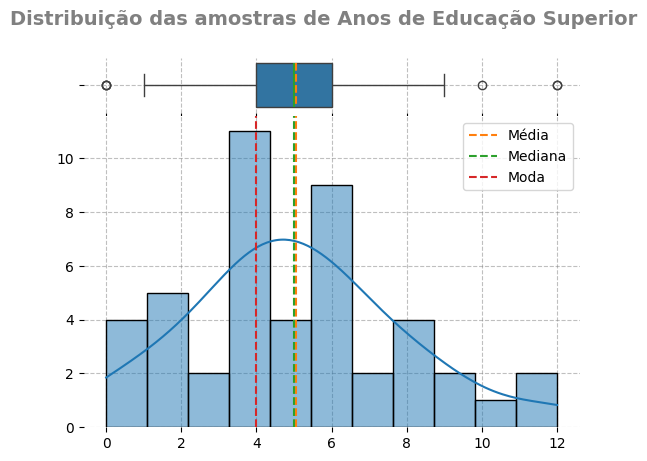

In [23]:
composicao_histograma_boxplot(df, 'Anos_Educ_Superior', titulo="Distribuição das amostras de Anos de Educação Superior")

## Tempo de Empresa

In [31]:
# Aplicar a função
estatisticas_df_tempo_empresa = calcular_estatisticas(df['Tempo_Empresa'].to_numpy())

# Exibir as estatísticas
print("Estatísticas para a coluna 'Tempo_Empresa' do DataFrame:")
for chave, valor in estatisticas_df_tempo_empresa.items():
    print(f"{chave}: {valor:.2f}")

Estatísticas para a coluna 'Tempo_Empresa' do DataFrame:
Média: 10.33
Mediana: 8.50
Moda: 6.00
Variância: 57.78
Desvio Padrão: 7.60
Assimetria: 0.58
Curtose: 2.22
1º Quartil: 5.25
2º Quartil (Mediana): 8.50
3º Quartil: 17.25


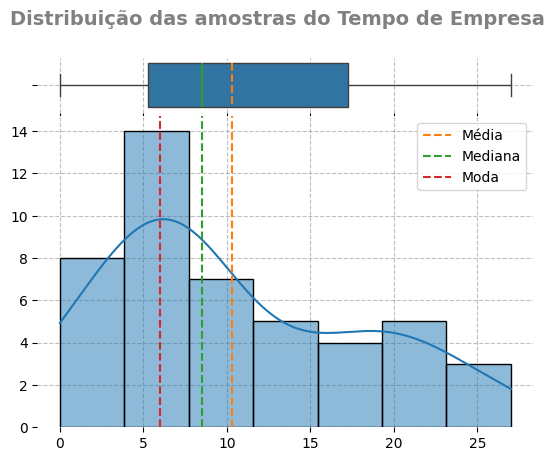

In [26]:
composicao_histograma_boxplot(df, 'Tempo_Empresa', titulo="Distribuição das amostras do Tempo de Empresa")

## Tempo em Outras Empresas

In [32]:
# Aplicar a função
estatisticas_df_tempo_outras_empresas = calcular_estatisticas(df['Tempo_Outras_Empresas'].to_numpy())

# Exibir as estatísticas
print("Estatísticas para a coluna 'Tempo_Outras_Empresas' do DataFrame:")
for chave, valor in estatisticas_df_tempo_outras_empresas.items():
    print(f"{chave}: {valor:.2f}")

Estatísticas para a coluna 'Tempo_Outras_Empresas' do DataFrame:
Média: 4.61
Mediana: 4.00
Moda: 6.00
Variância: 13.89
Desvio Padrão: 3.73
Assimetria: 1.84
Curtose: 7.65
1º Quartil: 2.25
2º Quartil (Mediana): 4.00
3º Quartil: 6.00


## Inglês

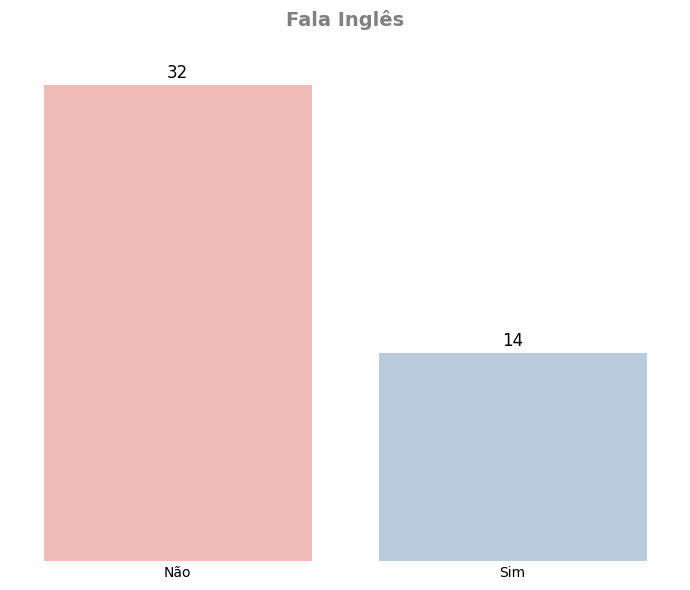

In [57]:
# Cria a contagem de valores na coluna 'Ingles'
ingles_counts = df['Ingles'].value_counts().reset_index()
ingles_counts.columns = ['Ingles', 'Count']

# Define o ciclo de cores com o cycler
cores = plt.get_cmap('Pastel1').colors
ciclo_cores = cycler('color', cores)
plt.rc('axes', prop_cycle=ciclo_cores)

# Cria o gráfico de barras
plt.figure(figsize=(7, 6))
ax = sns.barplot(
    data=ingles_counts, 
    x='Ingles', 
    y='Count',
    hue='Ingles',
    dodge=False,
    legend=False
)

# Adiciona os rótulos de dados
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')
    
# Título
ax.set_title("Fala Inglês", fontsize=14, fontweight='bold', color='gray', pad=25)
    
# Tirar as bordas dos eixos
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remover o eixo Y
ax.set_yticks([])

# Remover os títulos dos eixos
ax.set_ylabel('')
ax.set_xlabel('')

# Remover os tracinhos do eixo X
ax.tick_params(axis="x", length=0)

# Ajustar layout
plt.tight_layout()
plt.show()